In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import r2_score
import warnings

In [2]:
rabindra_Sarobar = pd.read_csv('C:/Users/shova/iCloudDrive/Kolkata_data/Work/Semi_processed/Rabindra_Sarobar.csv') 
rabindra_Sarobar.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard
0,2019-08-06,17.90,32.69,12.34,7.21,2.38,0.17,34.74,29.95,34.74,Good
1,2019-08-07,18.32,34.02,5.98,8.45,1.36,0.16,29.94,27.24,34.02,Good
2,2019-08-08,18.75,35.35,13.96,7.56,1.10,0.23,9.90,27.24,35.35,Good
3,2019-08-09,17.05,30.03,17.17,7.67,1.21,0.24,9.02,29.39,30.03,Good
4,2019-08-10,23.90,36.21,26.45,9.67,1.51,0.55,8.25,28.94,39.83,Good


In [3]:
rabindra_Sarobar['Date'] = pd.to_datetime(rabindra_Sarobar['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
rabindra_Sarobar["month"] = rabindra_Sarobar["Date"].dt.month
rabindra_Sarobar["week"] = rabindra_Sarobar["Date"].dt.strftime('%V').astype('int64')
rabindra_Sarobar["week_day"] = rabindra_Sarobar["Date"].dt.weekday
rabindra_Sarobar.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard,month,week,week_day
0,2019-08-06,17.90,32.69,12.34,7.21,2.38,0.17,34.74,29.95,34.74,Good,8,32,1
1,2019-08-07,18.32,34.02,5.98,8.45,1.36,0.16,29.94,27.24,34.02,Good,8,32,2
2,2019-08-08,18.75,35.35,13.96,7.56,1.10,0.23,9.90,27.24,35.35,Good,8,32,3
3,2019-08-09,17.05,30.03,17.17,7.67,1.21,0.24,9.02,29.39,30.03,Good,8,32,4
4,2019-08-10,23.90,36.21,26.45,9.67,1.51,0.55,8.25,28.94,39.83,Good,8,32,5


In [4]:
rabindra_Sarobar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1244 non-null   datetime64[ns]
 1   PM2.5         1244 non-null   float64       
 2   PM10          1244 non-null   float64       
 3   NO2           1244 non-null   float64       
 4   NH3           1244 non-null   float64       
 5   SO2           1244 non-null   float64       
 6   CO            1244 non-null   float64       
 7   Ozone         1244 non-null   float64       
 8   AT            1244 non-null   float64       
 9   AQI           1244 non-null   float64       
 10  AQI_Standard  1244 non-null   object        
 11  month         1244 non-null   int64         
 12  week          1244 non-null   int64         
 13  week_day      1244 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 136.2+ KB


## Support Vector Regression

In [5]:
model_svr = SVR(kernel = 'rbf', C=100,  epsilon=0.1)

### PM 2.5

In [6]:
data_pm25 = pd.DataFrame()
data_pm25["month"] = rabindra_Sarobar["month"]
data_pm25["week"] = rabindra_Sarobar["week"]
data_pm25["week_day"] = rabindra_Sarobar["week_day"]
data_pm25["PM2.5"] = rabindra_Sarobar["PM2.5"]
cols = data_pm25.columns
data_pm25.head()

,month,week,week_day,PM2.5
0,8,32,1,17.90
1,8,32,2,18.32
2,8,32,3,18.75
3,8,32,4,17.05
4,8,32,5,23.90


In [7]:
# shuffling the data set
data_pm25 = data_pm25.sample(frac=1).reset_index()
data_pm25 = data_pm25.drop('index', axis=1)
data_pm25.head()

,month,week,week_day,PM2.5
0,4,15,4,28.92
1,10,40,0,15.18
2,5,19,0,14.31
3,1,2,6,65.41
4,12,50,3,55.88


In [8]:
duplicate_pm25 = data_pm25.copy()

In [9]:
#normalizing the dataset
data_pm25 = preprocessing.normalize(data_pm25,norm='l2')
data_pm25 = pd.DataFrame(data_pm25, columns=cols)

In [10]:
X_pm25 = data_pm25.drop('PM2.5', axis=1) #data basically refere to the values in the independent columns
X_pm25.shape

(1244, 3)

In [11]:
y_pm25 = data_pm25.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)
y_pm25.shape      

(1244, 1)

In [12]:
X_train = X_pm25.head(995)
X_test = X_pm25.tail(249)
y_train = y_pm25.head(995)
y_test = y_pm25.tail(249)

In [13]:
rabindra_Sarobar_pm25_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [14]:
predictions_pm25 = rabindra_Sarobar_pm25_svr.predict(X_test)

In [15]:
r2 = r2_score(y_test, predictions_pm25)
print('r2 score for  model is', r2)

r2 score for  model is 0.956086538705833


In [16]:
#RSME - Root Mean Square Error
predictions_pm25 = predictions_pm25.reshape(249,1)
np.sqrt(((predictions_pm25 - y_test)**2).mean())

PM2.5    0.05909
dtype: float64

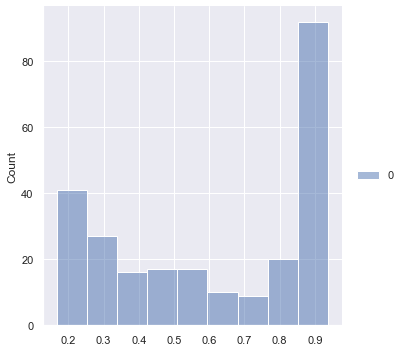

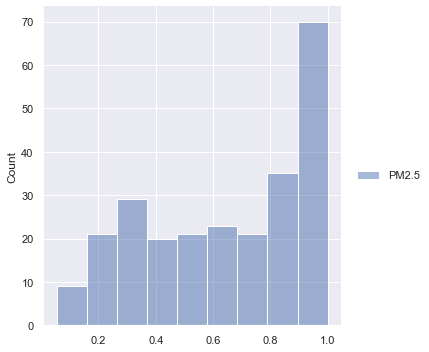

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm25)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

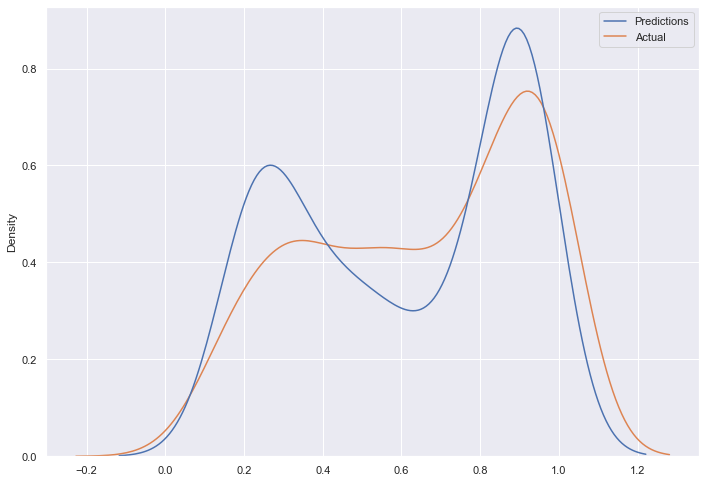

In [18]:
results = pd.DataFrame(predictions_pm25, columns = ['Predictions'])
results["Actual"] = list(y_test["PM2.5"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### PM10

In [19]:
data_pm10 = pd.DataFrame()
data_pm10["month"] = rabindra_Sarobar["month"]
data_pm10["week"] = rabindra_Sarobar["week"]
data_pm10["week_day"] = rabindra_Sarobar["week_day"]
data_pm10["PM10"] = rabindra_Sarobar["PM10"]
cols = data_pm10.columns
data_pm10.head()

,month,week,week_day,PM10
0,8,32,1,32.69
1,8,32,2,34.02
2,8,32,3,35.35
3,8,32,4,30.03
4,8,32,5,36.21


In [20]:
# shuffling the data set
data_pm10 = data_pm10.sample(frac=1).reset_index()
data_pm10 = data_pm10.drop('index', axis=1)
data_pm10.head()

,month,week,week_day,PM10
0,9,36,1,51.16
1,10,43,3,94.09
2,8,34,2,25.96
3,12,50,1,110.61
4,11,46,3,137.76


In [21]:
duplicate_pm10 = data_pm10.copy()

In [22]:
#normalizing the dataset
data_pm10 = preprocessing.normalize(data_pm10,norm='l2')
data_pm10 = pd.DataFrame(data_pm10, columns=cols)

In [23]:
X_pm10 = data_pm10.drop('PM10', axis=1) #data basically refere to the values in the independent columns
y_pm10 = data_pm10.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [24]:
X_train = X_pm10.head(995)
X_test = X_pm10.tail(249)
y_train = y_pm10.head(995)
y_test = y_pm10.tail(249)

In [25]:
rabindra_Sarobar_pm10_model_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [26]:
predictions_pm10 = rabindra_Sarobar_pm10_model_svr.predict(X_test)

In [27]:
r2 = r2_score(y_test, predictions_pm10)
print('r2 score for   model is', r2)

r2 score for   model is 0.7166341702159911


In [28]:
predictions_pm10.shape

(249,)

In [29]:
#RSME - Root Mean Square Error
predictions4 = predictions_pm10.reshape(249,1)
np.sqrt(((predictions4 - y_test)**2).mean())

PM10    0.088168
dtype: float64

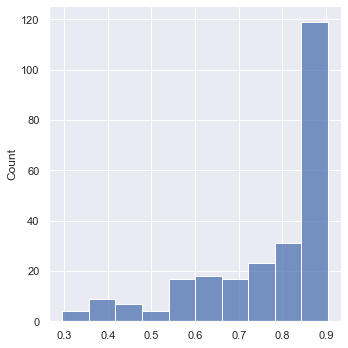

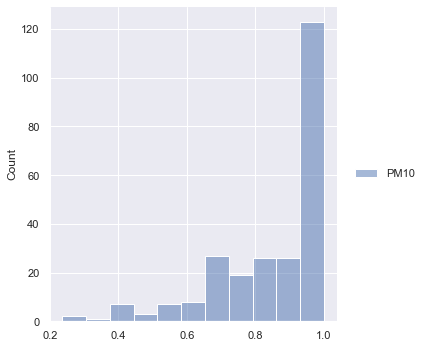

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm10)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

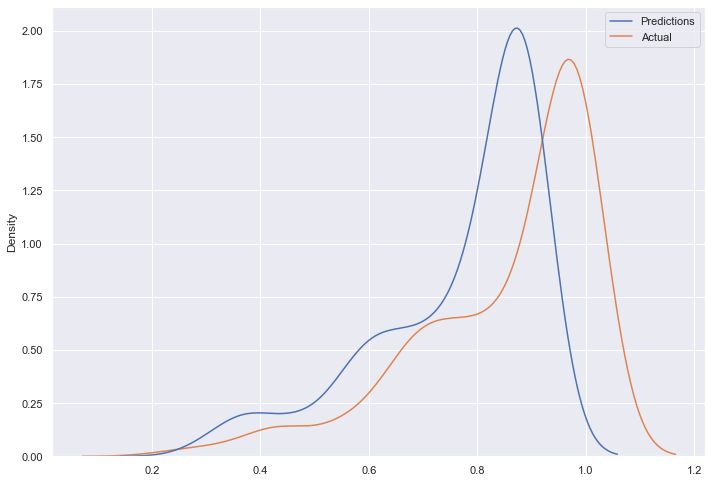

In [31]:
results = pd.DataFrame(predictions_pm10, columns = ['Predictions'])
results["Actual"] = list(y_test["PM10"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NO2

In [32]:
data_no2 = pd.DataFrame()
data_no2["month"] = rabindra_Sarobar["month"]
data_no2["week"] = rabindra_Sarobar["week"]
data_no2["week_day"] = rabindra_Sarobar["week_day"]
data_no2["NO2"] = rabindra_Sarobar["NO2"]
cols = data_no2.columns
data_no2.head()

,month,week,week_day,NO2
0,8,32,1,12.34
1,8,32,2,5.98
2,8,32,3,13.96
3,8,32,4,17.17
4,8,32,5,26.45


In [33]:
# shuffling the data set
data_no2 = data_no2.sample(frac=1).reset_index()
data_no2 = data_no2.drop('index', axis=1)
data_no2.head()

,month,week,week_day,NO2
0,11,48,5,66.43
1,10,41,0,17.39
2,11,46,1,71.73
3,6,25,3,6.41
4,2,7,1,137.51


In [34]:
duplicate_no2 = data_no2.copy()

In [35]:
#normalizing the dataset
data_no2 = preprocessing.normalize(data_no2,norm='l2')
data_no2 = pd.DataFrame(data_no2, columns=cols)

In [36]:
X_no2 = data_no2.drop('NO2', axis=1) #data basically refere to the values in the independent columns
y_no2 = data_no2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [37]:
X_train = X_no2.head(995)
X_test = X_no2.tail(249)
y_train = y_no2.head(995)
y_test = y_no2.tail(249)

In [38]:
rabindra_Sarobar_no2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [39]:
predictions_no2 = rabindra_Sarobar_no2_svr.predict(X_test)

In [40]:
r2 = r2_score(y_test, predictions_no2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9605225112609406


In [41]:
predictions_no2.shape

(249,)

In [42]:
#RSME - Root Mean Square Error
predictions5 = predictions_no2.reshape(249,1)
np.sqrt(((predictions5 - y_test)**2).mean())

NO2    0.057884
dtype: float64

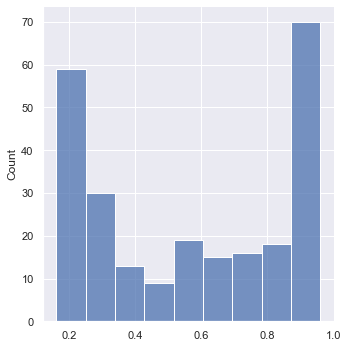

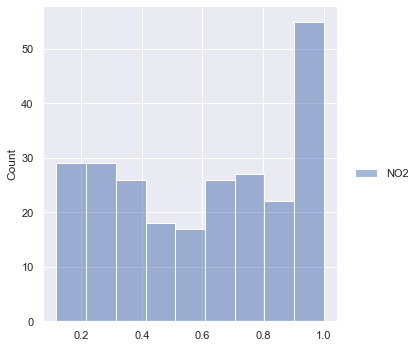

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_no2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

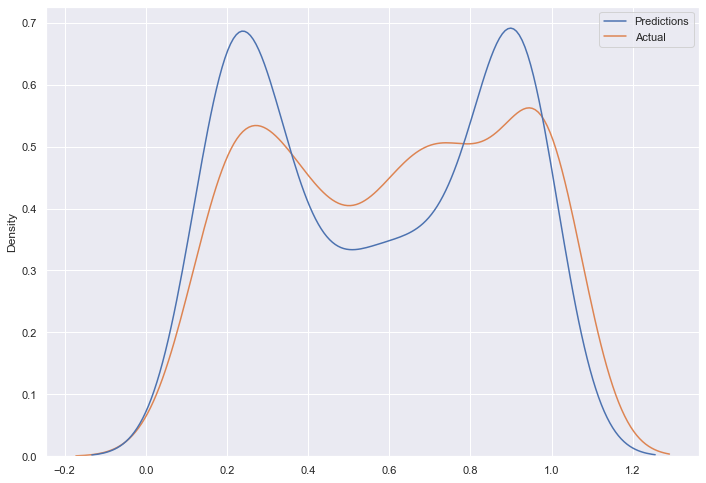

In [44]:
results = pd.DataFrame(predictions_no2, columns = ['Predictions'])
results["Actual"] = list(y_test["NO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NH3

In [45]:
data_nh3 = pd.DataFrame()
data_nh3["month"] = rabindra_Sarobar["month"]
data_nh3["week"] = rabindra_Sarobar["week"]
data_nh3["week_day"] = rabindra_Sarobar["week_day"]
data_nh3["NH3"] = rabindra_Sarobar["NH3"]
cols = data_nh3.columns
data_nh3.head()

,month,week,week_day,NH3
0,8,32,1,7.21
1,8,32,2,8.45
2,8,32,3,7.56
3,8,32,4,7.67
4,8,32,5,9.67


In [46]:
# shuffling the data set
data_nh3 = data_nh3.sample(frac=1).reset_index()
data_nh3 = data_nh3.drop('index', axis=1)
data_nh3.head()

,month,week,week_day,NH3
0,10,40,5,52.01
1,2,7,1,23.58
2,12,52,4,16.10
3,2,6,2,21.21
4,12,52,0,31.61


In [47]:
duplicate_nh3 = data_nh3.copy()

In [48]:
#normalizing the dataset
data_nh3 = preprocessing.normalize(data_nh3,norm='l2')
data_nh3 = pd.DataFrame(data_nh3, columns=cols)

In [49]:
X_nh3 = data_nh3.drop('NH3', axis=1) #data basically refere to the values in the independent columns
y_nh3 = data_nh3.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [50]:
X_train = X_nh3.head(995)
X_test = X_nh3.tail(249)
y_train = y_nh3.head(995)
y_test = y_nh3.tail(249)

In [51]:
rabindra_Sarobar_nh3_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [52]:
predictions_nh3 = rabindra_Sarobar_nh3_svr.predict(X_test)

In [53]:
r2 = r2_score(y_test, predictions_nh3)
print('r2 score for   model is', r2)

r2 score for   model is 0.9529024356861073


In [54]:
predictions_nh3.shape

(249,)

In [55]:
#RSME - Root Mean Square Error
predictions5 = predictions_nh3.reshape(249,1)
np.sqrt(((predictions5 - y_test)**2).mean())

NH3    0.055985
dtype: float64

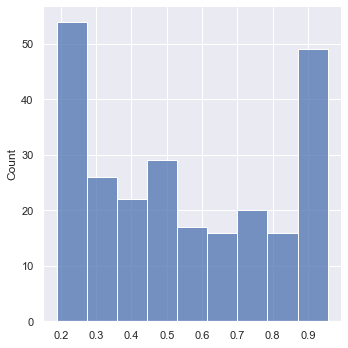

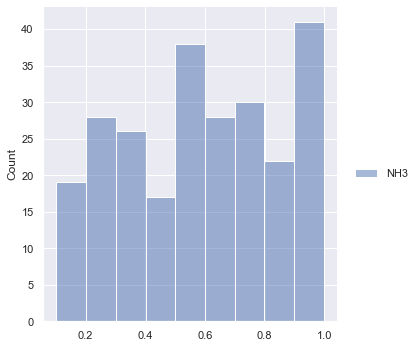

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_nh3)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

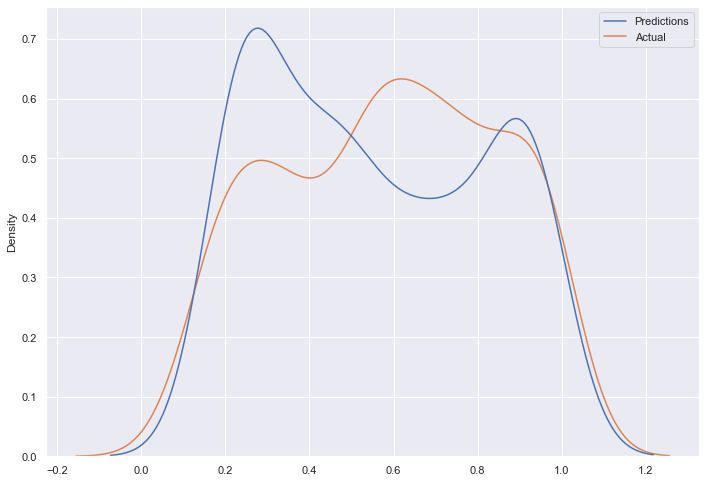

In [57]:
results = pd.DataFrame(predictions_nh3, columns = ['Predictions'])
results["Actual"] = list(y_test["NH3"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### SO2

In [58]:
data_so2 = pd.DataFrame()
data_so2["month"] = rabindra_Sarobar["month"]
data_so2["week"] = rabindra_Sarobar["week"]
data_so2["week_day"] = rabindra_Sarobar["week_day"]
data_so2["SO2"] = rabindra_Sarobar["SO2"]
cols = data_so2.columns
data_so2.head()

,month,week,week_day,SO2
0,8,32,1,2.38
1,8,32,2,1.36
2,8,32,3,1.10
3,8,32,4,1.21
4,8,32,5,1.51


In [59]:
# shuffling the data set
data_so2 = data_so2.sample(frac=1).reset_index()
data_so2 = data_so2.drop('index', axis=1)
data_so2.head()

,month,week,week_day,SO2
0,4,17,0,4.95
1,5,21,0,3.30
2,10,41,2,6.87
3,9,39,2,1.79
4,3,11,0,9.94


In [60]:
duplicate_so2 = data_so2.copy()

In [61]:
#normalizing the dataset
data_so2 = preprocessing.normalize(data_so2,norm='l2')
data_so2 = pd.DataFrame(data_so2, columns=cols)

In [62]:
X_so2 = data_so2.drop('SO2', axis=1) #data basically refere to the values in the independent columns
y_so2 = data_so2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [63]:
X_train = X_so2.head(995)
X_test = X_so2.tail(249)
y_train = y_so2.head(995)
y_test = y_so2.tail(249)

In [64]:
rabindra_Sarobar_so2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [65]:
predictions_so2 = rabindra_Sarobar_so2_svr.predict(X_test)

In [66]:
r2 = r2_score(y_test, predictions_so2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9649143548738957


In [67]:
predictions_so2.shape

(249,)

In [68]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(249,1)
np.sqrt(((predictions5 - y_test)**2).mean())

SO2    0.052045
dtype: float64

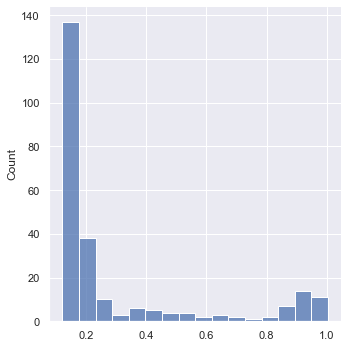

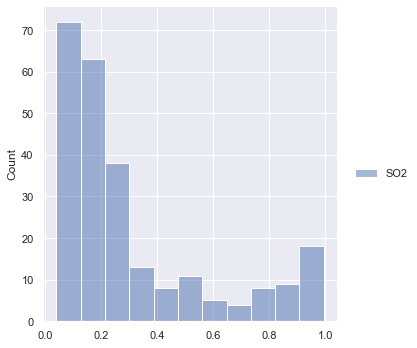

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_so2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

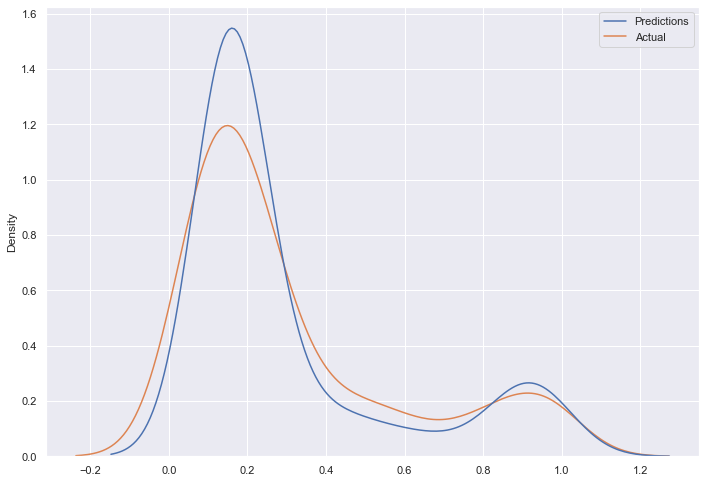

In [70]:
results = pd.DataFrame(predictions_so2, columns = ['Predictions'])
results["Actual"] = list(y_test["SO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### CO

In [71]:
data_co = pd.DataFrame()
data_co["month"] = rabindra_Sarobar["month"]
data_co["week"] = rabindra_Sarobar["week"]
data_co["week_day"] = rabindra_Sarobar["week_day"]
data_co["CO"] = rabindra_Sarobar["CO"]
cols = data_co.columns
data_co.head()

,month,week,week_day,CO
0,8,32,1,0.17
1,8,32,2,0.16
2,8,32,3,0.23
3,8,32,4,0.24
4,8,32,5,0.55


In [72]:
# shuffling the data set
data_co = data_co.sample(frac=1).reset_index()
data_co = data_co.drop('index', axis=1)
data_co.head()

,month,week,week_day,CO
0,9,38,3,0.14
1,10,41,3,0.57
2,3,12,2,0.69
3,7,28,0,0.53
4,12,51,4,1.22


In [73]:
duplicate_co = data_co.copy()

In [74]:
'''#normalizing the dataset
data_co = preprocessing.normalize(data_co,norm='l2')
data_co = pd.DataFrame(data_co, columns=cols)''' 
# Normalization is not working properly in terms of carbon monoxide

"#normalizing the dataset\ndata_co = preprocessing.normalize(data_co,norm='l2')\ndata_co = pd.DataFrame(data_co, columns=cols)"

In [75]:
X_co = data_co.drop('CO', axis=1) #data basically refere to the values in the independent columns
y_co = data_co.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [76]:
X_train = X_co.head(995)
X_test = X_co.tail(249)
y_train = y_co.head(995)
y_test = y_co.tail(249)

In [77]:
rabindra_Sarobar_co_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [78]:
predictions_co = rabindra_Sarobar_co_svr.predict(X_test)

In [79]:
r2 = r2_score(y_test, predictions_co)
print('r2 score for   model is', r2)

r2 score for   model is 0.5612739058285834


In [80]:
predictions_so2.shape

(249,)

In [81]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(249,1)
np.sqrt(((predictions5 - y_test)**2).mean())

CO    0.72434
dtype: float64

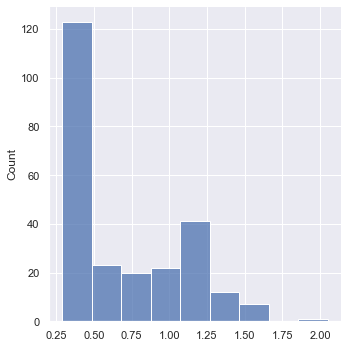

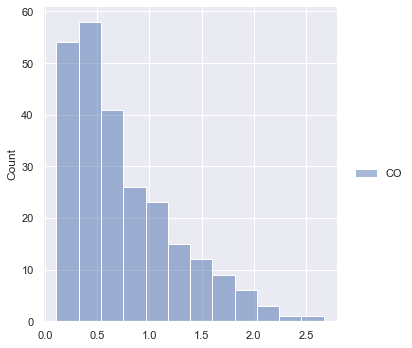

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_co)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

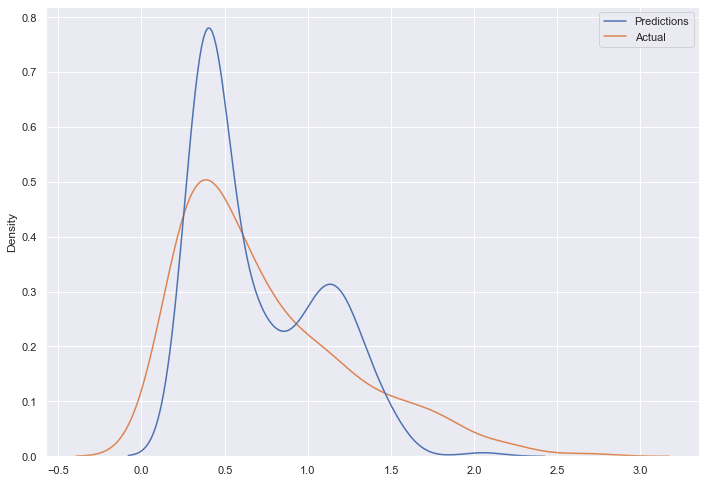

In [83]:
results = pd.DataFrame(predictions_co, columns = ['Predictions'])
results["Actual"] = list(y_test["CO"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Ozone

In [84]:
data_ozone = pd.DataFrame()
data_ozone["month"] = rabindra_Sarobar["month"]
data_ozone["week"] = rabindra_Sarobar["week"]
data_ozone["week_day"] = rabindra_Sarobar["week_day"]
data_ozone["Ozone"] = rabindra_Sarobar["Ozone"]
cols = data_ozone.columns
data_ozone.head()

,month,week,week_day,Ozone
0,8,32,1,34.74
1,8,32,2,29.94
2,8,32,3,9.90
3,8,32,4,9.02
4,8,32,5,8.25


In [85]:
# shuffling the data set
data_ozone = data_ozone.sample(frac=1).reset_index()
data_ozone = data_ozone.drop('index', axis=1)
data_ozone.head()

,month,week,week_day,Ozone
0,12,49,5,38.67
1,8,33,4,19.82
2,12,50,3,33.80
3,11,46,3,32.07
4,12,50,5,35.78


In [86]:
duplicate_ozone = data_ozone.copy()

In [87]:
#normalizing the dataset
data_ozone = preprocessing.normalize(data_ozone,norm='l2')
data_ozone = pd.DataFrame(data_ozone, columns=cols)

In [88]:
X_o3 = data_ozone.drop('Ozone', axis=1) #data basically refere to the values in the independent columns
y_o3= data_ozone.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [89]:
X_train = X_o3.head(995)
X_test = X_o3.tail(249)
y_train = y_o3.head(995)
y_test = y_o3.tail(249)

In [90]:
rabindra_Sarobar_ozone_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [91]:
predictions_ozone = rabindra_Sarobar_ozone_svr.predict(X_test)

In [92]:
r2 = r2_score(y_test, predictions_ozone)
print('r2 score for   model is', r2)

r2 score for   model is 0.8986233759568908


In [93]:
predictions_ozone.shape

(249,)

In [94]:
#RSME - Root Mean Square Error
predictions5 = predictions_ozone.reshape(249,1)
np.sqrt(((predictions5 - y_test)**2).mean())

Ozone    0.069316
dtype: float64

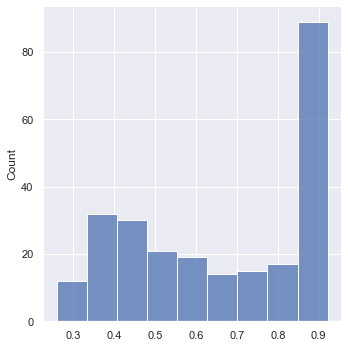

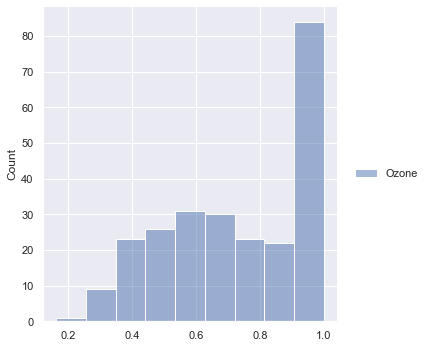

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_ozone)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

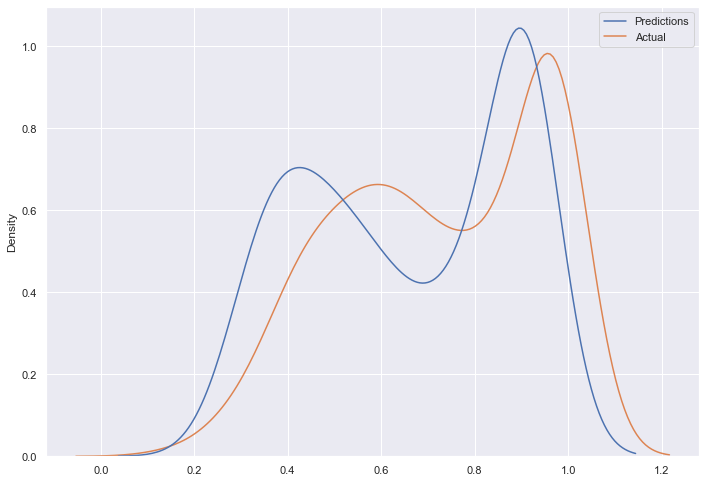

In [96]:
results = pd.DataFrame(predictions_ozone, columns = ['Predictions'])
results["Actual"] = list(y_test["Ozone"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### AQI

In [97]:
data_aqi = pd.DataFrame()
data_aqi["month"] = rabindra_Sarobar["month"]
data_aqi["week"] = rabindra_Sarobar["week"]
data_aqi["week_day"] = rabindra_Sarobar["week_day"]
data_aqi["AQI"] = rabindra_Sarobar["AQI"]
cols = data_aqi.columns
data_aqi.head()

,month,week,week_day,AQI
0,8,32,1,34.74
1,8,32,2,34.02
2,8,32,3,35.35
3,8,32,4,30.03
4,8,32,5,39.83


In [98]:
# shuffling the data set
data_aqi = data_aqi.sample(frac=1).reset_index()
data_aqi = data_aqi.drop('index', axis=1)
data_aqi.head()

,month,week,week_day,AQI
0,10,42,6,62.32
1,9,39,1,49.98
2,4,17,1,65.98
3,6,26,1,49.01
4,5,20,1,26.43


In [99]:
duplicate_aqi = data_aqi.copy()

In [100]:
#normalizing the dataset
data_aqi = preprocessing.normalize(data_aqi,norm='l2')
data_aqi = pd.DataFrame(data_aqi, columns=cols)

In [101]:
X_aqi = data_aqi.drop('AQI', axis=1) #data basically refere to the values in the independent columns
y_aqi = data_aqi.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [102]:
X_train = X_aqi.head(995)
X_test = X_aqi.tail(249)
y_train = y_aqi.head(995)
y_test = y_aqi.tail(249)

In [103]:
rabindra_Sarobar_aqi_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [104]:
predictions_aqi = rabindra_Sarobar_aqi_svr.predict(X_test)

In [105]:
r2 = r2_score(y_test, predictions_aqi)
print('r2 score for   model is', r2)

r2 score for   model is 0.5622282378624476


In [106]:
predictions_aqi.shape

(249,)

In [107]:
predictions3 = predictions_aqi.reshape(249,1)
np.sqrt(((predictions3 - y_test)**2).mean())

AQI    0.093047
dtype: float64

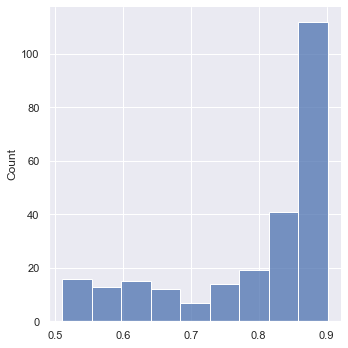

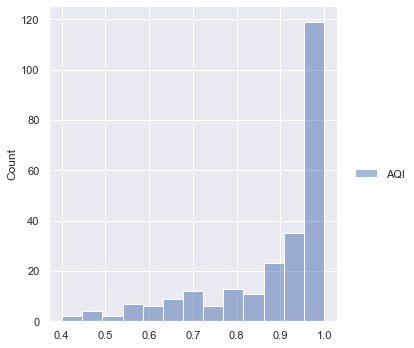

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_aqi)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

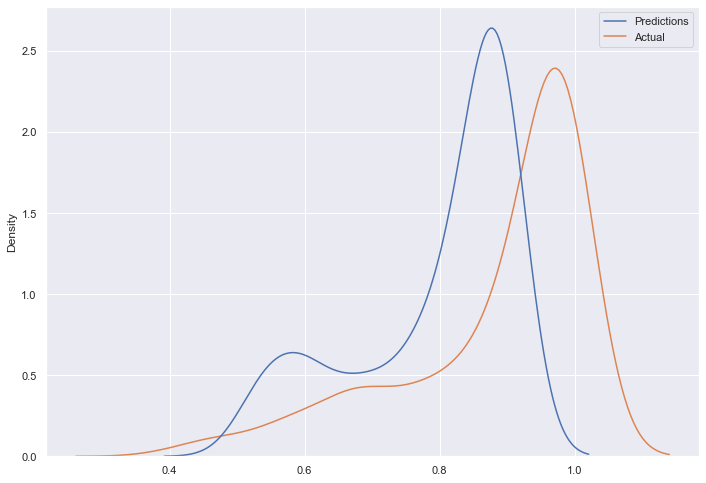

In [109]:
results = pd.DataFrame(predictions_aqi, columns = ['Predictions'])
results["Actual"] = list(y_test["AQI"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Prediction Functions

In [110]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

##2. PM10 Sub-Index calculation
def PM10(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

##3. NO2 Sub-Index calculation
def NO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


##4. NH3 Sub-Index calculation
def NH3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

##5. SO2 Sub-Index calculation
def SO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

##6. CO Sub-Index calculation
def CO(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

##7. O3 Sub-Index calculation
def O3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [111]:
def aqi(l):
    final = max(PM25(l[0]),PM10(l[1]),NO2(l[2]),NH3(l[3]),SO2(l[4]),CO(l[5]),O3(l[6]))
    if final >=0 and final<=50:
        return([round(final,2),"Good"])
    elif final>50 and final<=100:
        return([round(final,2),"Satisfactory"])
    elif final>100 and final<= 200:
        return([round(final,2),"Moderately Polluted"])
    elif final>200 and final<=300:
        return([round(final,2),"Poor"])
    elif final>300 and final<=400:
        return([round(final,2),"Very poor"])
    elif final>400:
        return([round(final,2),"Severe"])

In [112]:
def predictor_pm25(query, model_pm25,data_pm25,X):
    results = [] 
    location = data_pm25.loc[(data_pm25['month'] == query[0]) & (data_pm25['week'] == query[1]) & (data_pm25['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm25.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm25.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_pm10(query, model_pm10,data_pm10,X):
    results = [] 
    location = data_pm10.loc[(data_pm10['month'] == query[0]) & (data_pm10['week'] == query[1]) & (data_pm10['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm10.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm10.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_no2(query, model_no2, data_no2,X):
    results = []
    location = data_no2.loc[(data_no2['month'] == query[0]) & (data_no2['week'] == query[1]) & (data_no2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_no2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_no2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_nh3(query, model_nh3, data_nh3,X):
    results = [] 
    location = data_nh3.loc[(data_nh3['month'] == query[0]) & (data_nh3['week'] == query[1]) & (data_nh3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_nh3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_nh3.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_so2(query, model_so2,data_so2,X):
    results = [] 
    location = data_so2.loc[(data_so2['month'] == query[0]) & (data_so2['week'] == query[1]) & (data_so2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_so2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_so2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_co(query, model_co,data_co,X):
    results = [] 
    location = data_co.loc[(data_co['month'] == query[0]) & (data_co['week'] == query[1]) & (data_co['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_co.predict(np.array(query).reshape(1,-1)))
    return(sum(results) / len(results))

def predictor_o3(query, model_o3,data_o3,X):
    results = []
    location = data_o3.loc[(data_o3['month'] == query[0]) & (data_o3['week'] == query[1]) & (data_o3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_o3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_o3.loc[l]**2)))
    return(sum(results) / len(results))

In [113]:
def precal(date, model_pm25,model_pm10,model_no2,model_nh3,model_so2,model_co,model_o3,data_pm25,data_pm10,data_no2, data_nh3,data_so2,data_co,data_o3,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3):
    query = []
    result = []
    date = pd.DataFrame(date)
    date[0] = pd.to_datetime(date[0],format="%Y-%m-%d")
    query.append(list(date[0].dt.month)[0])
    query.append(list(date[0].dt.strftime('%V').astype('int64'))[0])
    query.append(list(date[0].dt.weekday)[0])
    result.append(predictor_pm25(query,model_pm25, data_pm25,X_pm25))
    result.append(predictor_pm10(query,model_pm10, data_pm10,X_pm10))
    result.append(predictor_no2(query,model_no2, data_no2,X_no2))
    result.append(predictor_nh3(query,model_nh3, data_nh3,X_nh3))
    result.append(predictor_so2(query,model_so2, data_so2,X_so2))
    result.append(predictor_co(query,model_co, data_co,X_co))
    result.append(predictor_o3(query,model_o3, data_o3,X_o3))
    ans = aqi(result)
    print("Expected:-\nPM 2.5: " + str(result[0])+"\nPM 10: " + str(result[1])+"\nNO2: " + str(result[2])+"\nNH3: " + str(result[3])+"\nSO2: " + str(result[4])+"\nCO: " + str(result[5])+"\nO3: " + str(result[6]))
    print("\nThe AQI value is expected to be around " + str(ans[0]) + " and the index is expected to be " + ans[1])
    

In [114]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.filterwarnings(action='ignore', category=UserWarning) # setting ignore as a parameter and further adding category
precal(["2019-08-30"],rabindra_Sarobar_pm25_svr,rabindra_Sarobar_pm10_model_svr,rabindra_Sarobar_no2_svr,rabindra_Sarobar_nh3_svr,rabindra_Sarobar_so2_svr,rabindra_Sarobar_co_svr,rabindra_Sarobar_ozone_svr,duplicate_pm25,duplicate_pm10,duplicate_no2,duplicate_nh3,duplicate_so2,duplicate_co,duplicate_ozone,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3)

Expected:-
PM 2.5: [19.14664971]
PM 10: [27.80285612]
NO2: [18.69771623]
NH3: [18.49805811]
SO2: [18.29318916]
CO: [0.72349067]
O3: [23.02773815]

The AQI value is expected to be around 36.17 and the index is expected to be Good
